## FasterRCNN


#### Importación de Módulos

In [53]:
import zipfile
import io
from arcgis.gis import GIS
from arcgis.learn import FasterRCNN, prepare_data

#### 

In [2]:
# Inicia sesión en tu cuenta de ArcGIS Online
gis = GIS("https://www.arcgis.com", "TU_CUENTA_AGOL", "TU_PASSWORD_AGOL")

# Obtén un elemento en tu contenido que sea el archivo .zip que deseas descomprimir
imagenes_entrenamiento = gis.content.get("9e112735218d48e9ab24041965fd9fb8")

# Descarga el archivo .zip desde ArcGIS Online
archivo_zip = imagenes_entrenamiento.download(save_path="/arcgis", file_name="archivo.zip")

# Descomprime el archivo .zip en el directorio actual, al extraer, nos resulta una carpeta con los datos para entrenamiento
with zipfile.ZipFile(archivo_zip, 'r') as zip_ref:
    zip_ref.extractall("/arcgis")

#### Preparar Datos


In [4]:
# Establecemos la ruta de estos datos
path = '/arcgis/train/'

In [50]:
# Preparamos la data con las caracteristicas de cada imagen y el tipo de las etiquetas
data = prepare_data(path,
                    batch_size = 16,
                    resize_to = 720,
                    chip_size = 720,
                    dataset_type='PASCAL_VOC_rectangles')

#### Mostrar Clases

In [51]:
# Mostramos las clases actuales
data.classes

['background', 'pothole']

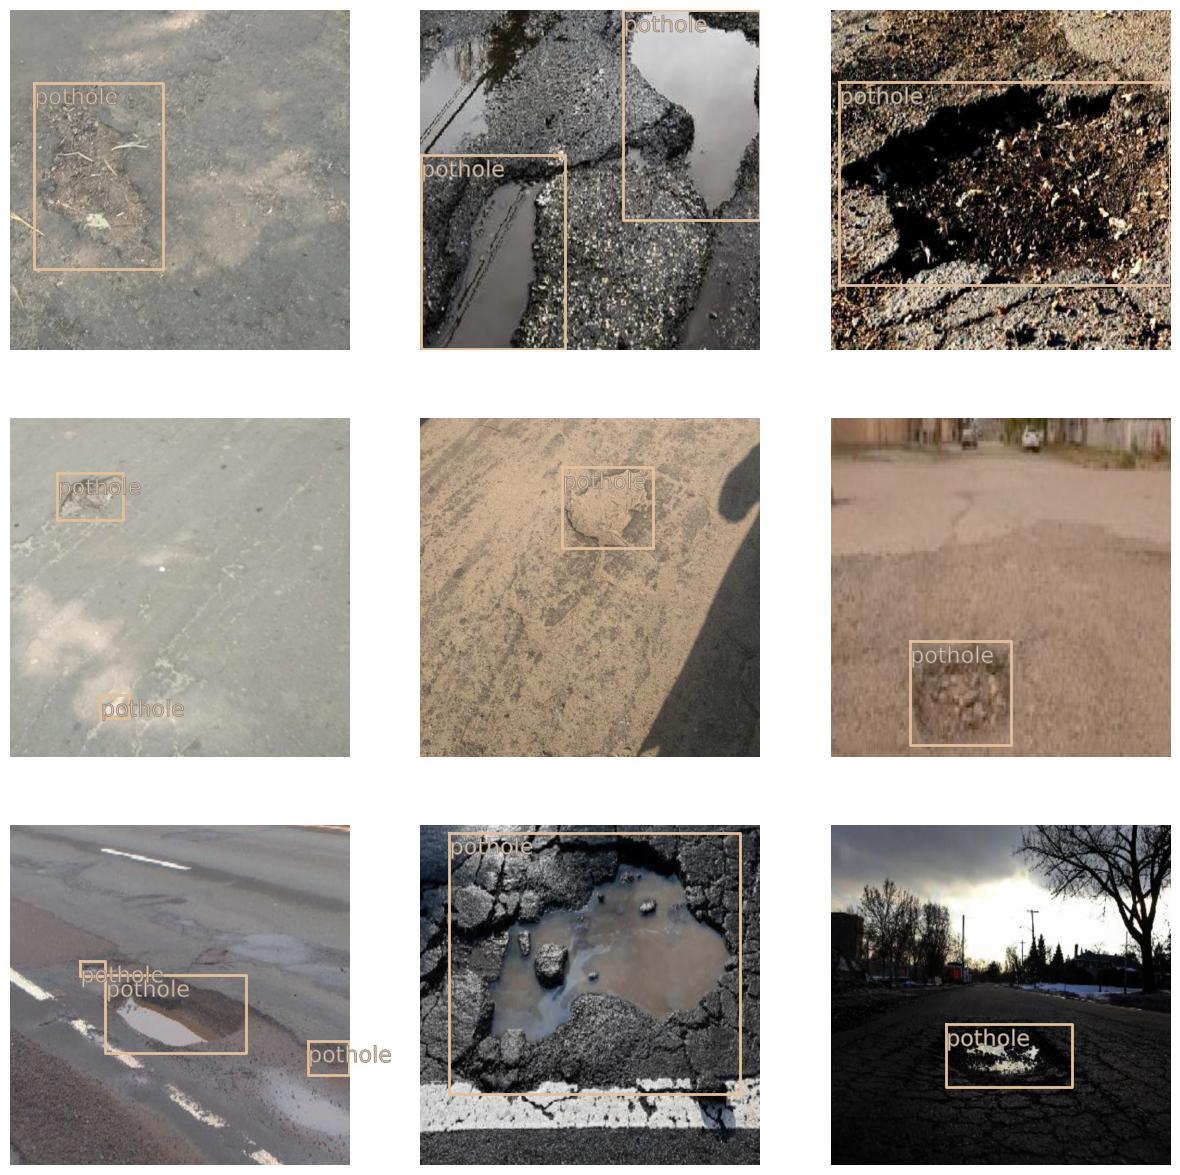

In [ ]:
# Imagenes de muestra
data.show_batch()

#### Entrenar Modelo

In [ ]:
# Establecemos FasterRCNN con la data preparada anteriormente
modelo_RCNN = FasterRCNN(data)

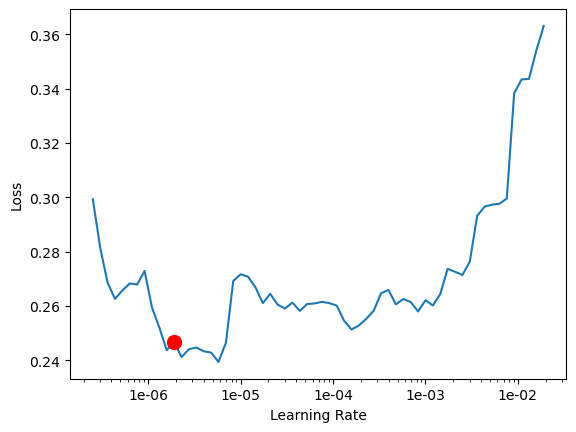

1.9054607179632473e-06

In [24]:
# Hallamos la tasa de aprendizaje del modelo y lo mostramos
lr = modelo_RCNN.lr_find()
lr

In [25]:
# Entrenamos el modelo 100 épocas y la tasa de aprendizaje es dinámica al rededor de la que encontramos anteriormente
modelo_RCNN.fit(100, lr=slice(1e-6 , 1e-5))

epoch,train_loss,valid_loss,average_precision,time
0,0.308370,0.315752,0.742081,00:14
1,0.285434,0.318188,0.742394,00:14
2,0.312135,0.322689,0.745466,00:14
3,0.279364,0.317131,0.746836,00:14
4,0.294438,0.317071,0.741047,00:14
5,0.284853,0.317826,0.748327,00:14
6,0.291486,0.316061,0.738690,00:14
7,0.281619,0.315389,0.743569,00:14
8,0.274893,0.318424,0.742511,00:14
9,0.279178,0.317513,0.750591,00:14


#### Guardar Modelo

In [26]:
# Establecemos una ruta en donde guardar el modelo entrenado
ruta = '/arcgis/modeloFasterRCNN'

In [27]:
# Guardamos el modelo en dicha ruta, queremos usarlo más adelante en PyTorch, de aquí el framework
modelo_RCNN.save(ruta, framework = 'PyTorch')

Computing model metrics...


PosixPath('/arcgis/modeloFasterRCNN2')

#### 

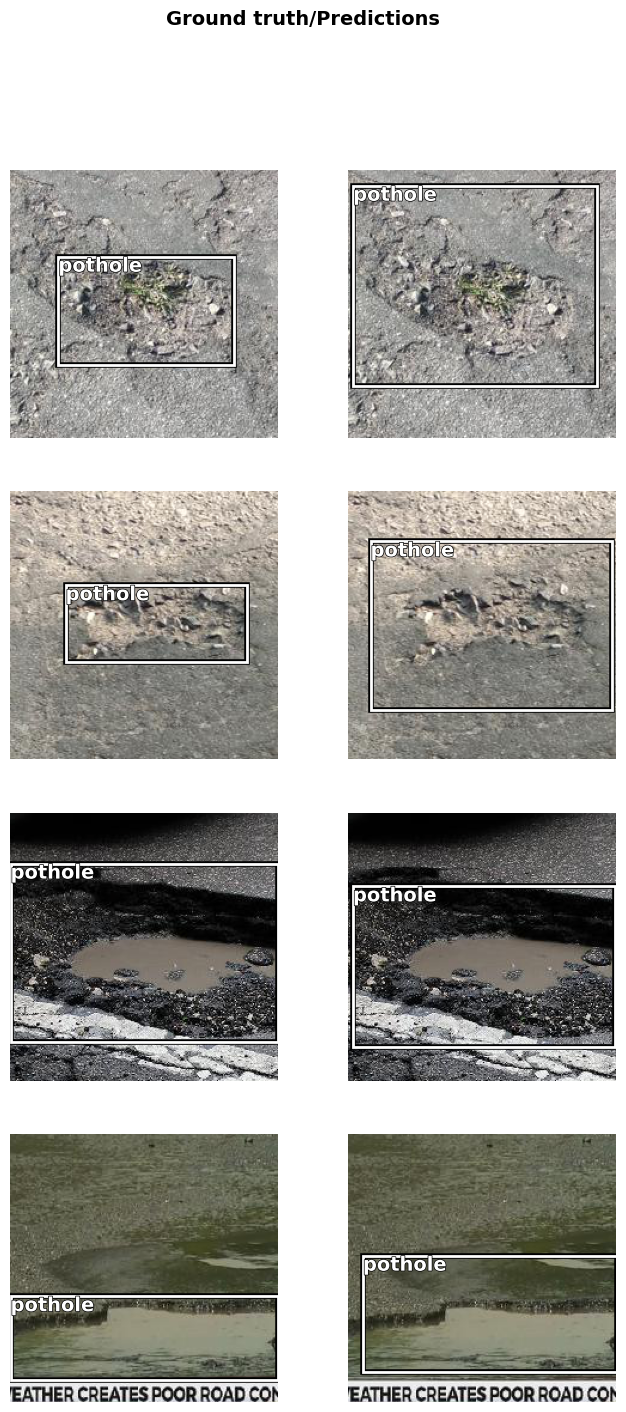

In [32]:
# Mostramos los resultados obtenidos con una confianza del 90%
modelo_RCNN.show_results(thresh=0.9)